# Example 1: Which player had the highest percentage of shots outside the box?

In [11]:
import nwslpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [12]:
# Load all matches and filter to ones in the year 2022
matches = nwslpy.load_matches()
matches = matches[matches["season"] == "2022"]
matches.head()

,home_team_id,away_team_id,kickoff,time,stadium,city,year,season,home_team_score,away_team_score,home_penalty_score,away_penalty_score,won_on_penalites,last_updated
match_id,,,,,,,,,,,,,,
angel-city-fc-vs-north-carolina-courage-2022-04-29,15,11,2022-04-29 22:30:00,22:30:00,BMO Stadium,"Los Angeles, California",2022,2022,2,1,0,0,False,2023-02-25
portland-thorns-fc-vs-kansas-city-current-2022-04-30,8,13,2022-04-30 18:00:00,18:00:00,Providence Park,"Portland, Oregon",2022,2022,3,0,0,0,False,2023-02-25
chicago-red-stars-vs-racing-louisville-fc-2022-04-30,2,14,2022-04-30 20:00:00,20:00:00,SeatGeek Stadium,"Bridgeview, Illinois",2022,2022,2,1,0,0,False,2023-02-25
washington-spirit-vs-ol-reign-2022-05-01,9,6,2022-05-01 17:00:00,17:00:00,Audi Field,"Washington, District of Columbia",2022,2022,2,1,0,0,False,2023-02-25
houston-dash-vs-san-diego-wave-fc-2022-05-01,4,16,2022-05-01 19:00:00,19:00:00,Shell Energy Stadium,"Houston, Texas",2022,2022,0,1,0,0,False,2023-02-25


In [13]:
# Load all players
players = nwslpy.load_players()
players.head()

,player_first_name,player_last_name,player_short_first_name,player_short_last_name,player_match_name,player_nationality,player_position,player_place_of_birth,player_known_name,last_updated
player_id,,,,,,,,,,
1,Angela Marguerite,Salem,Angela,Salem,A. Salem,USA,Midfielder,Akron,NaN,2023-02-06
2,Louise,Schillgard,Louise,Schillgard,L. Schillgard,Sweden,Midfielder,Stockholm,NaN,2023-02-06
3,Natasha Khalila,Dowie,Natasha,Dowie,N. Dowie,England,Attacker,Abu Dhabi,NaN,2023-02-06
4,Kyah Pam,Simon,Kyah,Simon,K. Simon,Australia,Attacker,Blacktown,NaN,2023-02-06
5,Kylie Allyssa,Strom,Kylie,Strom,K. Strom,USA,Defender,Endicott,NaN,2023-02-06


In [14]:
# Some matches might not have stats so catch those errors
def try_load_player_match_stats(match_id):
    try:
        return nwslpy.load_player_match_stats(match_id)
    except:
        return pd.DataFrame([])
    
# Fetch player match stats for each match
df = pd.concat(matches.index.map(try_load_player_match_stats))

In [15]:
# Calculate the percent of shots outside the box
df = df[["player_id", "shots_total", "shots_outside_box"]]
df = df.groupby("player_id").agg({"shots_total": "sum", "shots_outside_box": "sum"})
df["percent_outside_box"] = df["shots_outside_box"] / df["shots_total"]

# Limit to players with at least 15 shots
df = df[df["shots_total"] >= 15]

In [16]:
# Join with player data and sort to find the top 10
df = df.join(players)
df = df.sort_values("percent_outside_box")
df = df.iloc[-10:].reset_index()
df

,player_id,shots_total,shots_outside_box,percent_outside_box,player_first_name,player_last_name,player_short_first_name,player_short_last_name,player_match_name,player_nationality,player_position,player_place_of_birth,player_known_name,last_updated
0,686,30,18,0.600000,Savannah Marie,DeMelo,Savannah,DeMelo,S. DeMelo,USA,Midfielder,NaN,NaN,2023-02-06
1,360,23,14,0.608696,Emily Louise,van Egmond,Emily,van Egmond,E. van Egmond,Australia,Midfielder,Newcastle,NaN,2023-02-06
2,74,23,14,0.608696,Erika,Tymrak,Erika,Tymrak,E. Tymrak,USA,Midfielder,Detroit,NaN,2023-02-06
3,403,26,16,0.615385,Sophie Diana,Schmidt,Sophie,Schmidt,S. Schmidt,Canada,Midfielder,Winnipeg,NaN,2023-02-06
4,49,17,11,0.647059,Sofia Christine,Huerta,Sofia,Huerta,S. Huerta,USA,Defender,Boise,NaN,2023-02-06
5,317,23,15,0.652174,Meggie,Dougherty Howard,Meggie,Dougherty Howard,M. Dougherty,USA,Midfielder,Largo,NaN,2023-02-06
6,701,15,10,0.666667,Marleen,Schimmer,Marleen,Schimmer,M. Schimmer,Germany,Midfielder,NaN,NaN,2023-02-06
7,480,30,22,0.733333,Hailie Jenae,Mace,Hailie,Mace,H. Mace,USA,Midfielder,Ventura,NaN,2023-02-06
8,640,20,15,0.750000,Alexis,Loera,Alex,Loera,A. Loera,USA,Defender,NaN,NaN,2023-02-06
9,676,23,18,0.782609,Samantha Grace,Coffey,Samantha,Coffey,S. Coffey,USA,Midfielder,NaN,NaN,2023-02-06


In [17]:
# Generate a formatted name label for each player
def name_label(row):
    if not pd.isna(row["player_known_name"]):
        return row["player_known_name"]
    else:
        return row["player_short_first_name"] + " " + row["player_short_last_name"]


df["name_label"] = df.apply(name_label, axis=1)
df

,player_id,shots_total,shots_outside_box,percent_outside_box,player_first_name,player_last_name,player_short_first_name,player_short_last_name,player_match_name,player_nationality,player_position,player_place_of_birth,player_known_name,last_updated,name_label
0,686,30,18,0.600000,Savannah Marie,DeMelo,Savannah,DeMelo,S. DeMelo,USA,Midfielder,NaN,NaN,2023-02-06,Savannah DeMelo
1,360,23,14,0.608696,Emily Louise,van Egmond,Emily,van Egmond,E. van Egmond,Australia,Midfielder,Newcastle,NaN,2023-02-06,Emily van Egmond
2,74,23,14,0.608696,Erika,Tymrak,Erika,Tymrak,E. Tymrak,USA,Midfielder,Detroit,NaN,2023-02-06,Erika Tymrak
3,403,26,16,0.615385,Sophie Diana,Schmidt,Sophie,Schmidt,S. Schmidt,Canada,Midfielder,Winnipeg,NaN,2023-02-06,Sophie Schmidt
4,49,17,11,0.647059,Sofia Christine,Huerta,Sofia,Huerta,S. Huerta,USA,Defender,Boise,NaN,2023-02-06,Sofia Huerta
5,317,23,15,0.652174,Meggie,Dougherty Howard,Meggie,Dougherty Howard,M. Dougherty,USA,Midfielder,Largo,NaN,2023-02-06,Meggie Dougherty Howard
6,701,15,10,0.666667,Marleen,Schimmer,Marleen,Schimmer,M. Schimmer,Germany,Midfielder,NaN,NaN,2023-02-06,Marleen Schimmer
7,480,30,22,0.733333,Hailie Jenae,Mace,Hailie,Mace,H. Mace,USA,Midfielder,Ventura,NaN,2023-02-06,Hailie Mace
8,640,20,15,0.750000,Alexis,Loera,Alex,Loera,A. Loera,USA,Defender,NaN,NaN,2023-02-06,Alex Loera
9,676,23,18,0.782609,Samantha Grace,Coffey,Samantha,Coffey,S. Coffey,USA,Midfielder,NaN,NaN,2023-02-06,Samantha Coffey


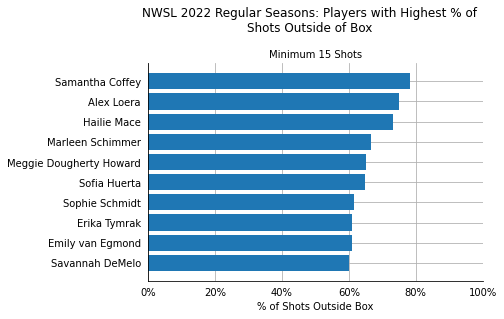

In [18]:
# Plot results
fig, ax = plt.subplots()
ax.barh(df.index, df["percent_outside_box"])

# Format ticks and axis labels
ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.set_axisbelow(True)
ax.grid()
ax.set_yticks(df.index, labels=df["name_label"])
ax.set_xlabel("% of Shots Outside Box")
ax.set_xlim([0, 1])
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add title and subtitle
plt.suptitle(
    "NWSL 2022 Regular Seasons: Players with Highest % of\nShots Outside of Box",
    va="bottom",
)
plt.title("Minimum 15 Shots", size=10);